# Linear Regression Using Gradient Descent

##### In this notebook I create a linear regression model which learns the slope and the y-intercept of the best fit line via minimizing the Mean Squared Error using Gradient Descent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Here I will import the data set that I have downloaded from https://www.kaggle.com/andonians/random-linear-regression.

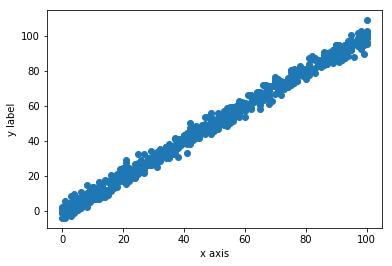

In [2]:
data = pd.read_csv('02-train.csv', sep=',')

# convert the imported data into numpy arrays
x = np.array(data['x'])
y = np.array(data['y'])

# cleaning the data 
x[213] = (x[212]+x[214])/2
y[213] = (y[212]+y[214])/2

# plot the data
plt.scatter(x,y)
plt.xlabel('x axis')
plt.ylabel('y label')
plt.show()

Now I will define the cost function as MSE, whose arguments are the input data x and y, slope, and the y-intercept of the line that we want to compute the error for.

In [3]:
# m: slope of the line
# b: y-intercept of the line
def costFunction(x, y, m, b):
    error = 0
    n = len(x)
    for i in range(n):
        error += ( (m*x[i] + b) - (y[i]) )**2

    error = error/float(n)
    return error

Next, I will define a function to implement the gradient descent minimization, whose arguments are the input data x and y, previous values of m and b, and the learning rate of the gradient descent algorithm.

In [4]:
# gamma: learning rate
def gradiantDscent(x, y, m_old, b_old, gamma):
    n = len(x)
    grad_m = 0  
    grad_b = 0   
    for i in range(n):
        grad_m += -(2/float(n)) * x[i] * (y[i] - (m_old*x[i] + b_old))
        grad_b += -(2/float(n)) * (y[i] - (m_old*x[i] + b_old))

    m_new = m_old - grad_m*gamma
    b_new = b_old - grad_b*gamma

    return m_new, b_new

Next, I will define a funciton that uses the previously defined functions to find the values of m and b such that the MSE is minimized. Therefore, using the optimal values of m and b, the line that fits the data best is found (learned).

In [5]:
def learn(gamma):
    m = 0   # initial value for m (slope)
    b = 0   # initial value for b (y-intercept)
    
    # declaring vectors to store the results of the gradient descent algorithm in each iteration
    error_vector = []
    m_vector = []
    b_vector = []

    for i in range(1000):
        error = costFunction(x, y, m, b)
        error_vector.append(error)
        
        m, b = gradiantDscent(x, y, m, b, gamma)
        m_vector.append(m)
        b_vector.append(b)

    return m_vector, b_vector, error_vector

Now, the learn function is called with the appropriate learning rate to find the optimal slope and y-intercept of the line that fits the data.

In [6]:
gamma = 0.00001
m, b, error = learn(gamma)

print('m:', m[len(m)-1])
print('b:', b[len(b)-1])
print('error:', error[len(error)-1])


m: 0.9988756375716781
b: 0.014334637436568494
error: 7.861993019956796


Here, I will use the model learned by linear regression to estimate the y values, and plot the original values of y and estimated values of y:

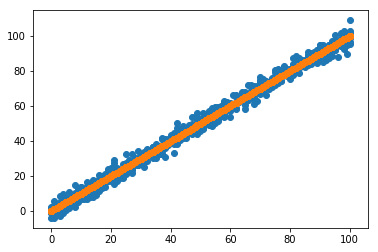

In [7]:
y_est = m[len(m)-1]*x + b[len(b)-1]

plt.scatter(x,y)
plt.scatter(x, y_est)
plt.show()

In order to visualize the steps taken by the gradient descent algorithm and how it minimizes the error I plot the values of error in each step as a function of the slope and y-intecept of the line in that step:

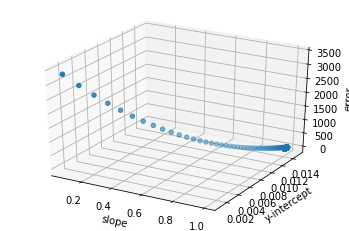

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(m, b, error)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('error')
plt.show()